In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
basic_info_df = pd.read_excel('C:/Users/Khushi/Documents/Unified Mentor Internship/Ent Data/Entertainer - Basic Info.xlsx')
breakthrough_info_df = pd.read_excel('C:/Users/Khushi/Documents/Unified Mentor Internship/Ent Data/Entertainer - Breakthrough Info.xlsx')
last_work_info_df = pd.read_excel('C:/Users/Khushi/Documents/Unified Mentor Internship/Ent Data/Entertainer - Last work Info.xlsx')

In [2]:
# Merge the dataframes on the 'Entertainer' column
merged_df = pd.merge(basic_info_df, breakthrough_info_df, on='Entertainer', how='inner')
merged_df = pd.merge(merged_df, last_work_info_df, on='Entertainer', how='inner')

# Clean the 'Birth Year' column
merged_df['Birth Year'] = pd.to_numeric(merged_df['Birth Year'], errors='coerce')

# Clean the 'Year of Last Major Work (arguable)' column
merged_df['Year of Last Major Work (arguable)'] = pd.to_numeric(merged_df['Year of Last Major Work (arguable)'], errors='coerce')

# Clean the 'Year of Breakthrough/#1 Hit/Award Nomination' column
merged_df['Year of Breakthrough/#1 Hit/Award Nomination'] = pd.to_numeric(merged_df['Year of Breakthrough/#1 Hit/Award Nomination'], errors='coerce')

# Display the cleaned dataframe
print(merged_df.head())

       Entertainer Gender (traditional)  Birth Year  \
0            Adele                    F        1988   
1   Angelina Jolie                    F        1975   
2  Aretha Franklin                    F        1942   
3      Bette Davis                    F        1908   
4      Betty White                    F        1922   

   Year of Breakthrough/#1 Hit/Award Nomination  \
0                                          2008   
1                                          1999   
2                                          1967   
3                                          1934   
4                                          1952   

                          Breakthrough Name  Year of First Oscar/Grammy/Emmy  \
0                                        19                           2009.0   
1                         Girl, Interrupted                           1999.0   
2  I Never Loved a Man (The Way I Love You)                           1968.0   
3                          Of Human Bondag

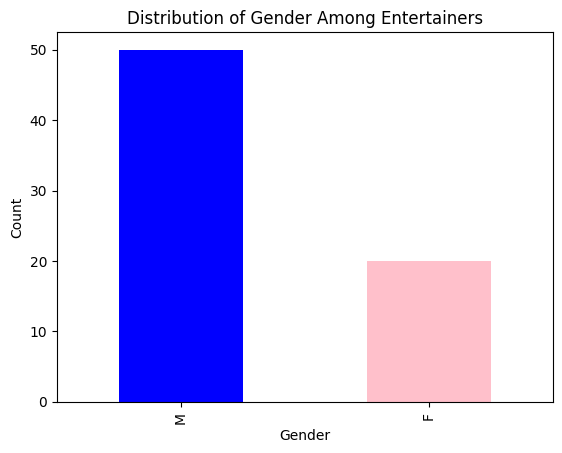

In [3]:
# Visualize the distribution of gender among entertainers
gender_distribution = basic_info_df['Gender (traditional)'].value_counts()
gender_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Gender Among Entertainers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

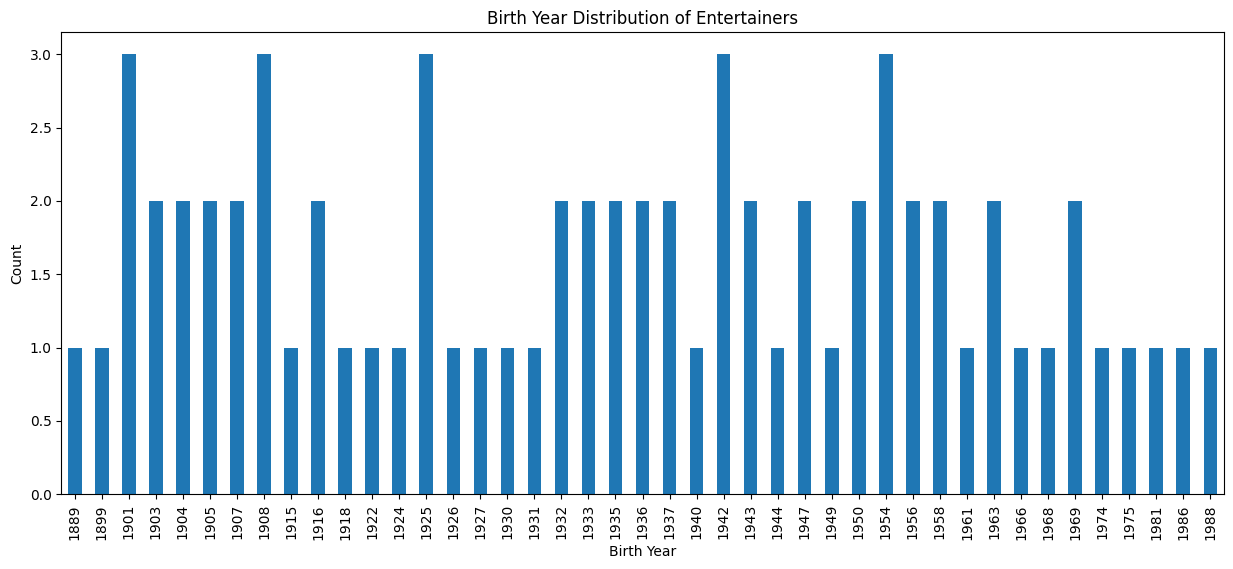

In [4]:
# Explore the birth years of entertainers to identify trends or patterns
birth_year_distribution = basic_info_df['Birth Year'].value_counts().sort_index()
birth_year_distribution.plot(kind='bar', figsize=(15, 6))
plt.title('Birth Year Distribution of Entertainers')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

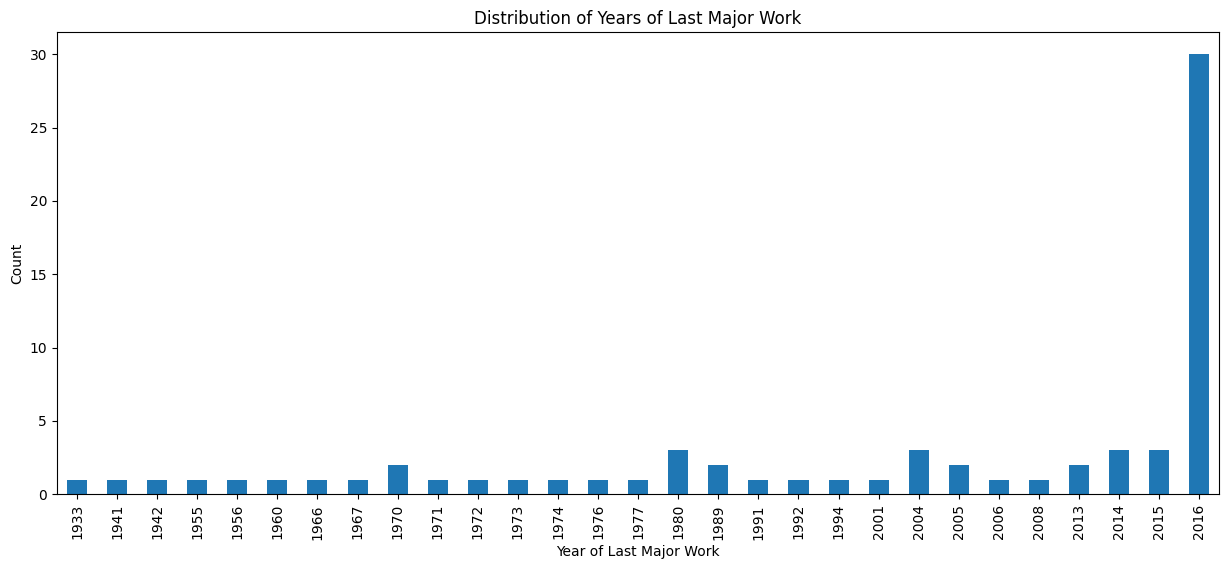

In [5]:
# Breakthrough Analysis

# Determine the year of breakthrough for each entertainer
breakthrough_years = breakthrough_info_df.groupby('Entertainer')['Year of Breakthrough/#1 Hit/Award Nomination'].min()

# Identify the most common types of breakthroughs
breakthrough_types = breakthrough_info_df['Breakthrough Name'].value_counts()

# Lifetime Achievement Analysis

# Identify the year of the last major work for each entertainer
last_work_years = last_work_info_df.groupby('Entertainer')['Year of Last Major Work (arguable)'].max()

# Explore the distribution of years of the last major work
last_work_year_distribution = last_work_years.value_counts().sort_index()
last_work_year_distribution.plot(kind='bar', figsize=(15, 6))
plt.title('Distribution of Years of Last Major Work')
plt.xlabel('Year of Last Major Work')
plt.ylabel('Count')
plt.show()

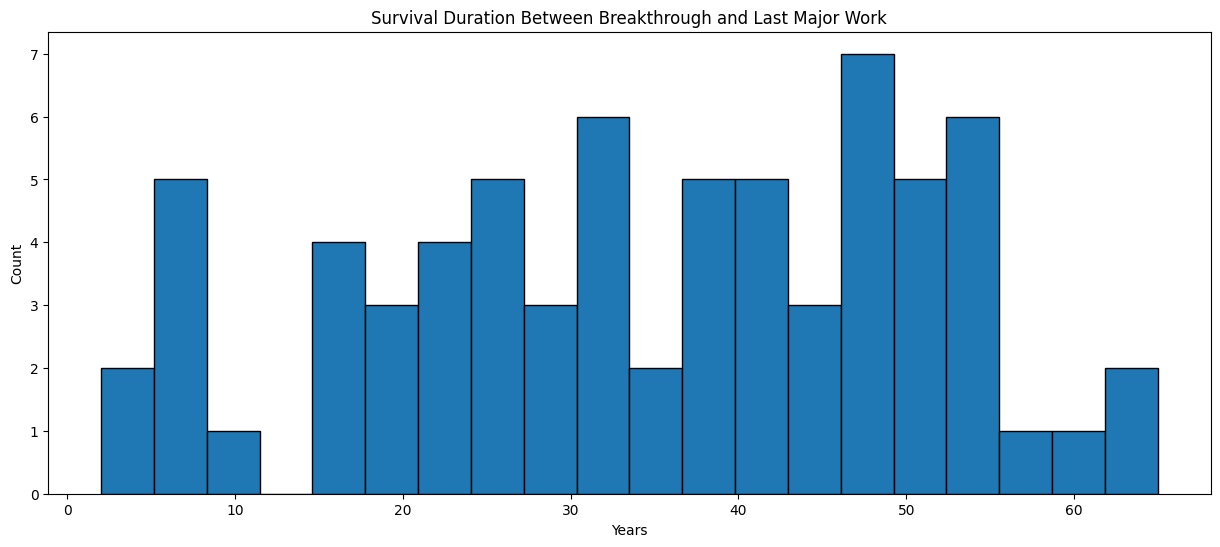

In [6]:
# Longevity in the Industry

# Analyze the gap between the year of breakthrough and the year of the last major work
longevity = last_work_years - breakthrough_years

# Comparative Analysis

# Compare the breakthrough and last major work years for different genders
gender_comparison = pd.concat([breakthrough_years, last_work_years, basic_info_df.set_index('Entertainer')['Gender (traditional)']], axis=1)

# Survival Analysis

# Calculate the duration between the breakthrough and the last major work
survival_duration = (last_work_years - breakthrough_years).dropna()

# Visualize the survival curve
survival_duration.plot(kind='hist', bins=20, edgecolor='black', figsize=(15, 6))
plt.title('Survival Duration Between Breakthrough and Last Major Work')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

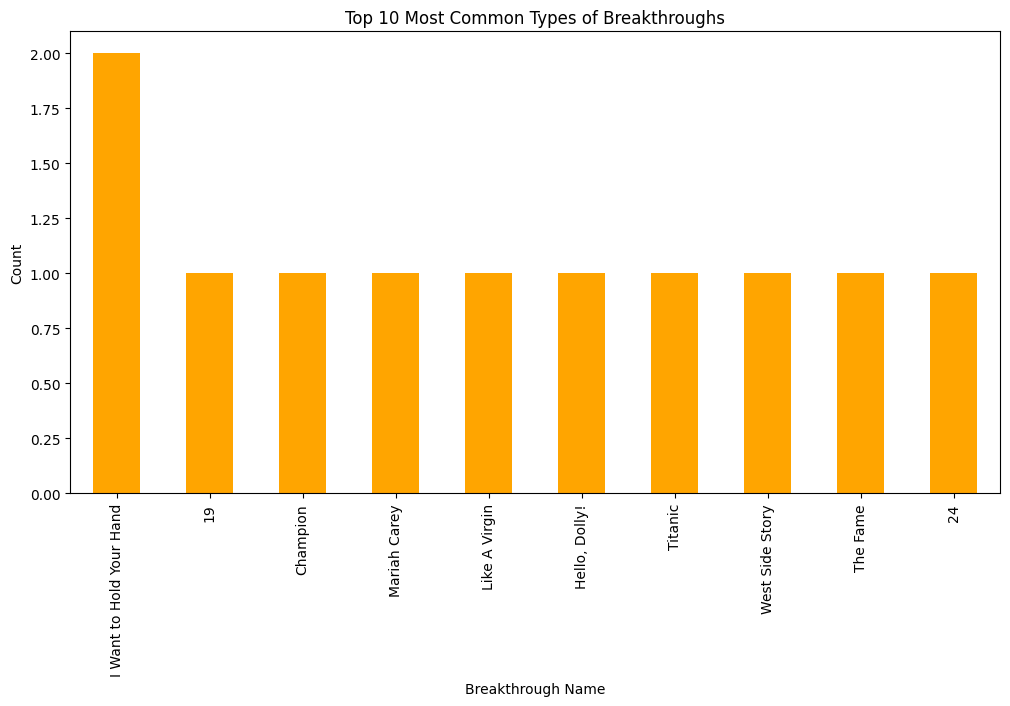

In [7]:
# Identify the most common types of breakthroughs
breakthrough_types = merged_df['Breakthrough Name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
breakthrough_types.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Types of Breakthroughs')
plt.xlabel('Breakthrough Name')
plt.ylabel('Count')
plt.show()

In [8]:
import seaborn as sns

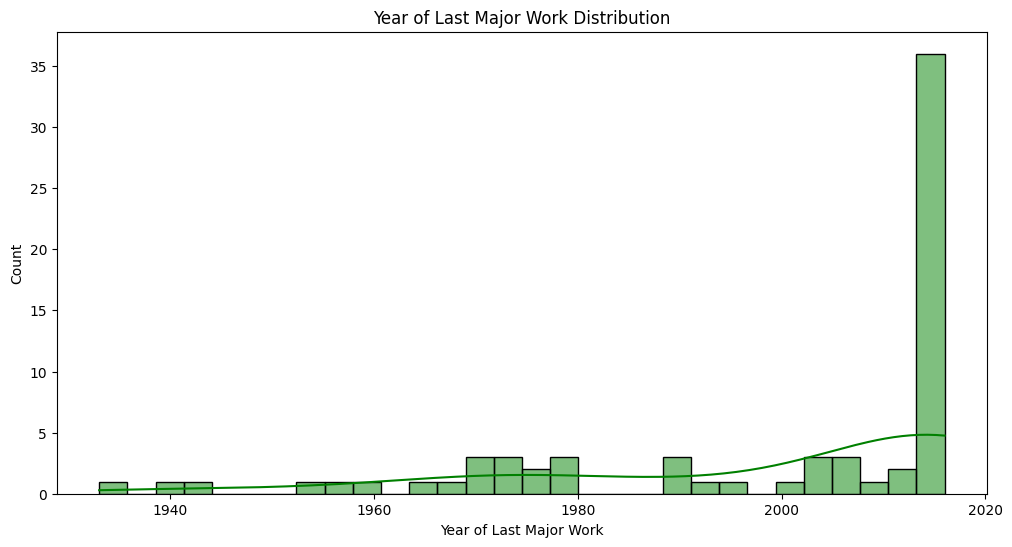

In [9]:
# Identify the year of the last major work for each entertainer
plt.figure(figsize=(12, 6))
sns.histplot(x='Year of Last Major Work (arguable)', data=merged_df, bins=30, kde=True, color='green')
plt.title('Year of Last Major Work Distribution')
plt.xlabel('Year of Last Major Work')
plt.ylabel('Count')
plt.show()

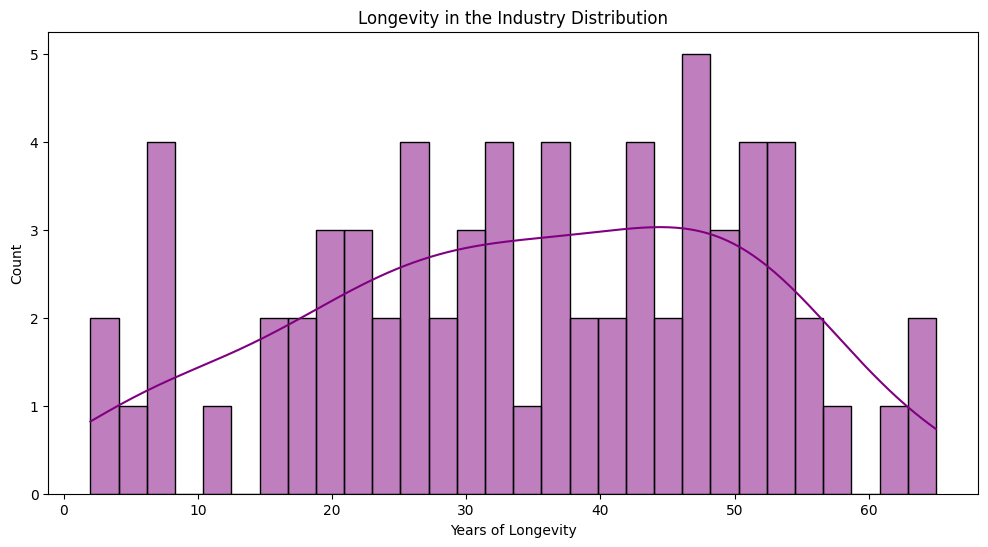

In [10]:
# Analyze the gap between the year of breakthrough and the year of the last major work
merged_df['Longevity'] = merged_df['Year of Last Major Work (arguable)'] - merged_df['Year of Breakthrough/#1 Hit/Award Nomination']

plt.figure(figsize=(12, 6))
sns.histplot(x='Longevity', data=merged_df, bins=30, kde=True, color='purple')
plt.title('Longevity in the Industry Distribution')
plt.xlabel('Years of Longevity')
plt.ylabel('Count')
plt.show()

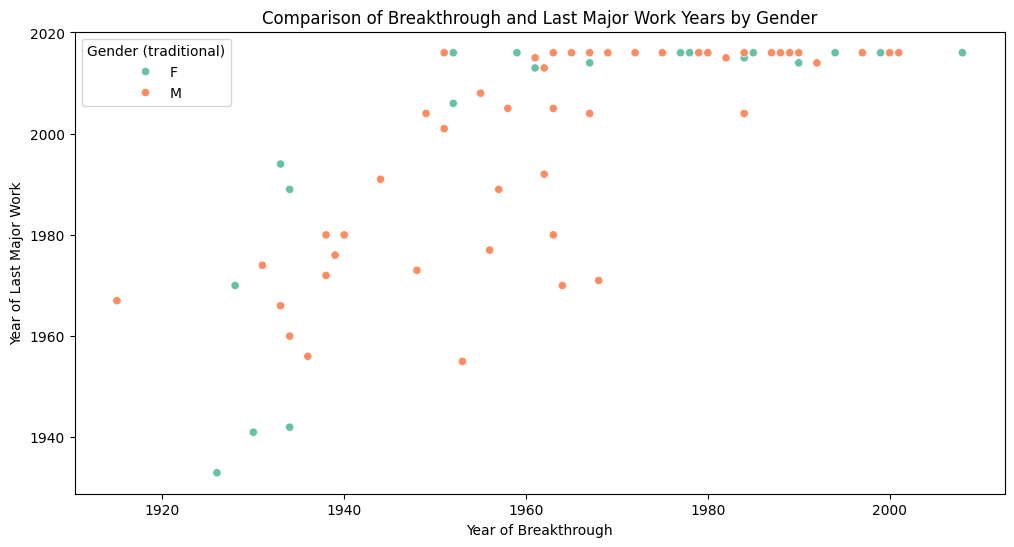

In [11]:
# Comparative Analysis

# Compare the breakthrough and last major work years for different genders
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year of Breakthrough/#1 Hit/Award Nomination', y='Year of Last Major Work (arguable)',
                hue='Gender (traditional)', data=merged_df, palette='Set2')
plt.title('Comparison of Breakthrough and Last Major Work Years by Gender')
plt.xlabel('Year of Breakthrough')
plt.ylabel('Year of Last Major Work')
plt.show()
